In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading the data  
df= pd.read_csv("Dataset.csv")

In [3]:
df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15359,15360,07-10-2012,winter,2012,10,4,No,0,No work,Mist,0.44,0.4394,0.54,0.2537,5,6,11
13043,13044,02-07-2012,fall,2012,7,16,No,1,Working Day,Clear,0.84,0.7424,0.36,0.2836,61,304,365
1748,1749,18-03-2011,springer,2011,3,13,No,5,Working Day,Clear,0.64,0.6212,0.41,0.2836,57,118,175
12143,12144,26-05-2012,summer,2012,5,4,No,6,No work,Clear,0.62,0.5606,0.88,0.1343,0,2,2
2453,2454,17-04-2011,summer,2011,4,3,No,0,No work,Clear,0.4,0.4091,0.66,0.1343,12,13,25
269,270,12-01-2011,springer,2011,1,16,No,3,Working Day,Clear,0.22,0.197,0.44,0.3284,5,63,68
3967,3968,19-06-2011,summer,2011,6,5,No,0,No work,Mist,0.66,0.6061,0.78,0,7,12,19
17260,17261,27-12-2012,springer,2012,12,1,No,4,Working Day,Light Snow,0.24,0.197,0.93,0.4478,0,5,5
7077,7078,27-10-2011,winter,2011,10,12,No,4,Working Day,Light Snow,0.5,0.4848,0.88,0.1343,8,45,53
5948,5949,10-09-2011,fall,2011,9,9,No,6,No work,Clear,0.64,0.5909,0.78,0.2985,39,168,207


In [4]:
df.nunique()

instant       17379
dteday          731
season            5
yr                3
mnth             13
hr               24
holiday           3
weekday           7
workingday        3
weathersit        5
temp             51
atemp            66
hum              90
windspeed        31
casual          323
registered      777
cnt             869
dtype: int64

In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


In [7]:
to_num=["temp","atemp","hum","windspeed","casual","registered",'yr',"mnth"]
for i in to_num:
        df[i] = pd.to_numeric(df[i], errors='coerce')
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y', errors='coerce')


In [8]:
df.describe()

,instant,dteday,yr,mnth,hr,weekday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17378.000000,17378.000000,17379.000000,17379.000000,17368.000000,17373.000000,17373.000000,17374.000000,17378.000000,17378.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2011.502589,6.537461,11.546752,3.003683,0.497132,0.475851,0.627208,0.190080,35.676603,153.792554,189.463088
min,1.0000,2011-01-01 00:00:00,2011.000000,1.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2011.000000,4.000000,6.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,2012.000000,7.000000,12.000000,3.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,2012.000000,10.000000,18.000000,5.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,2012.000000,12.000000,23.000000,6.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,3.438625,6.914405,2.005771,0.192525,0.171829,0.192939,0.122321,49.306423,151.359786,181.387599


In [9]:
#Upon examining the dataset, certain entries contain "?", which represent missing values and can be considered equivalent to None.
value = '?'

rows = df[df.isin([value]).any(axis=1)]
rows.shape

(16, 17)

In [10]:
# replacing "?" as NA to check for null values 
df = df.replace("?",None)

In [11]:
df.isnull().sum().sum ()

np.int64(48)

Only 48 rows out of 17,000 contain null values; hence, they are removed as their impact on the dataset is negligible.

In [12]:
df = df.dropna()
df.isnull().sum().sum ()

np.int64(0)

In [13]:
num_cols = df.select_dtypes(exclude='object').columns.tolist()
num_cols

['instant',
 'dteday',
 'yr',
 'mnth',
 'hr',
 'weekday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [14]:
cat_col = df.select_dtypes(include='object').columns.tolist()
cat_col

['season', 'holiday', 'workingday', 'weathersit']

In [15]:
for i in cat_col: 
    print(df[i].value_counts())
    print()

season
fall        4496
summer      4409
winter      4232
springer    4202
Name: count, dtype: int64

holiday
No     16845
Yes      494
Name: count, dtype: int64

workingday
Working Day    11844
No work         5495
Name: count, dtype: int64

weathersit
Clear         11400
Mist           4522
Light Snow     1414
Heavy Rain        3
Name: count, dtype: int64



As per the above output we can see that "Holiday" columns has only two data set in whichAs per the above output, the “Holiday” column contains only two distinct values, where “Yes” appears 494 times out of 17,379 records. Since this feature shows a highly imbalanced distribution and is unlikely to significantly impact the analysis, the “Holiday” column is therefore dropped. "yes" is only reapeated for 494 times outof 17379 which will not affect much to the data hence droppint the holiday coulmuns as well 

In [16]:
df.drop(['instant',"holiday"],axis=1,inplace=True)
cat_col.remove("holiday")

In [17]:
df = df.dropna()

In [18]:
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
df.head()

,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,springer,2011.0,1.0,0,6,No work,Clear,0.24,0.2879,0.81,0.0000,3.0,13.0,16
1,2011-01-01,springer,2011.0,1.0,1,6,No work,Clear,0.22,0.2727,0.80,0.0000,8.0,32.0,40
3,2011-01-01,springer,2011.0,1.0,3,6,No work,Clear,0.24,0.2879,0.75,0.0000,3.0,10.0,13
4,2011-01-01,springer,2011.0,1.0,4,6,No work,Clear,0.24,0.2879,0.75,0.0000,0.0,1.0,1
5,2011-01-01,springer,2011.0,1.0,5,6,No work,Mist,0.24,0.2576,0.75,0.0896,0.0,1.0,1


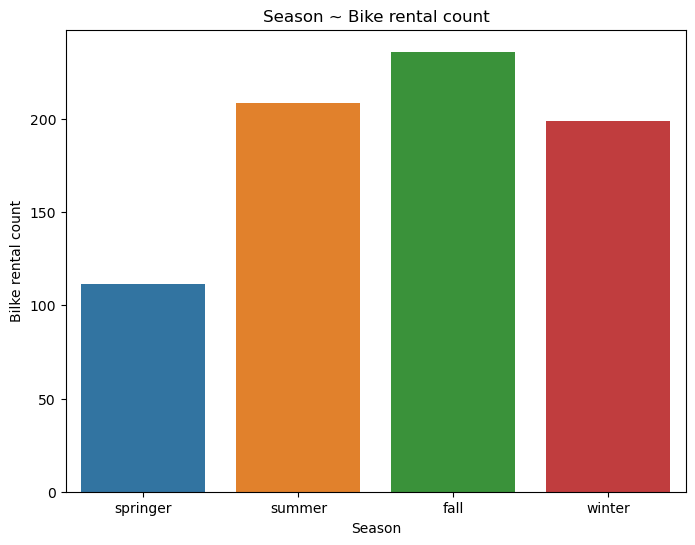

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='season',y='cnt', hue='season', errorbar=None)
plt.title("Season ~ Bike rental count")
plt.xlabel("Season")
plt.ylabel("Bilke rental count")
plt.show()


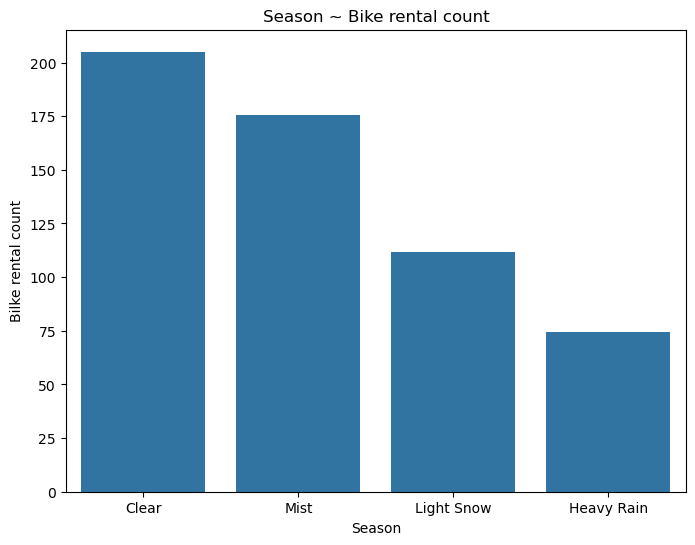

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='weathersit',y='cnt', errorbar=None)
plt.title("Season ~ Bike rental count")
plt.xlabel("Season")
plt.ylabel("Bilke rental count")
plt.show()

As expected, bike usage decreases during the rainy and snowy season, as people tend to avoid riding in such conditions.

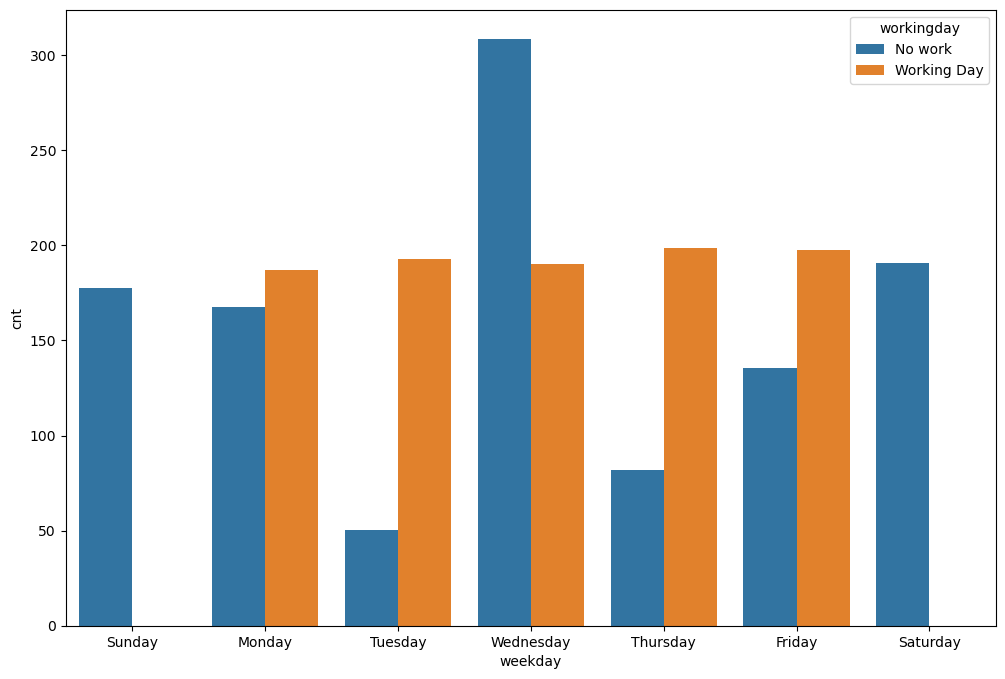

In [22]:
plt.figure(figsize=(12,8))
sns.barplot (data=df, x='weekday',y='cnt', hue='workingday' ,errorbar=None)
# sns.barplot(data=df,x= 'hr',y='casual')
plt.xticks(np.arange(7),["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])

plt.show()

Above visulization shows that the bike renal count is nearly constant during working days,  but suprisingly probably on holiday on wednesday the bike count is the highest .   

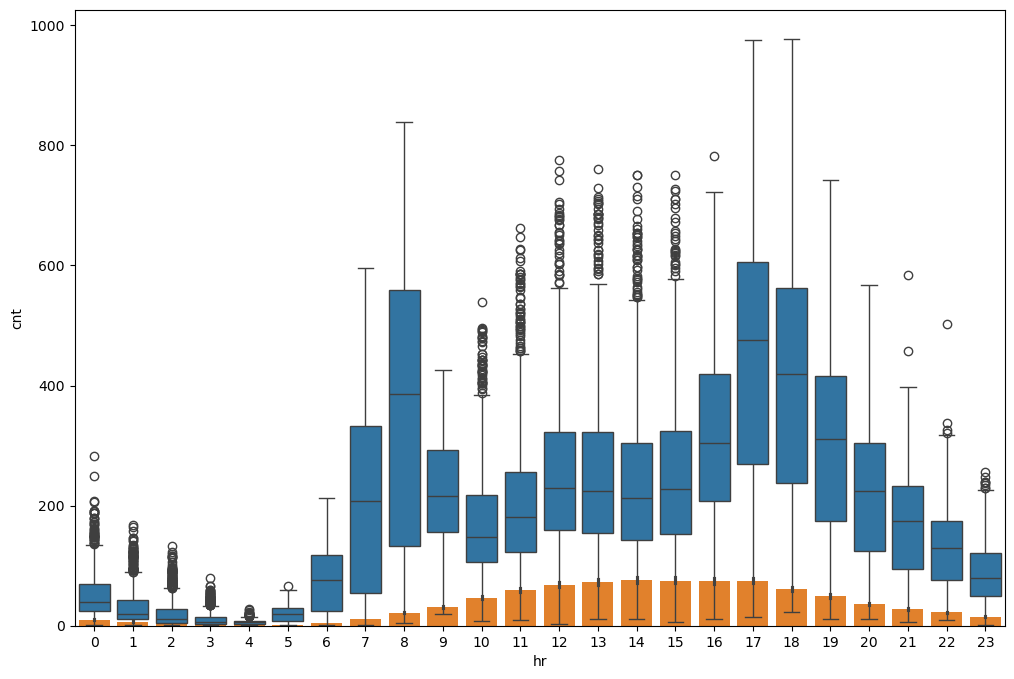

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot (data=df, x='hr',y='cnt' )
sns.barplot(data=df,x= 'hr',y='casual')

plt.show()

As observed, there is a noticeable increase in bike rentals during 7–8 AM and again at 5–6 PM (17–18 hours). This pattern suggests that many users rent bikes for office commuting purposes. Overall, bike rentals are most frequent between 7 AM and 8 PM.

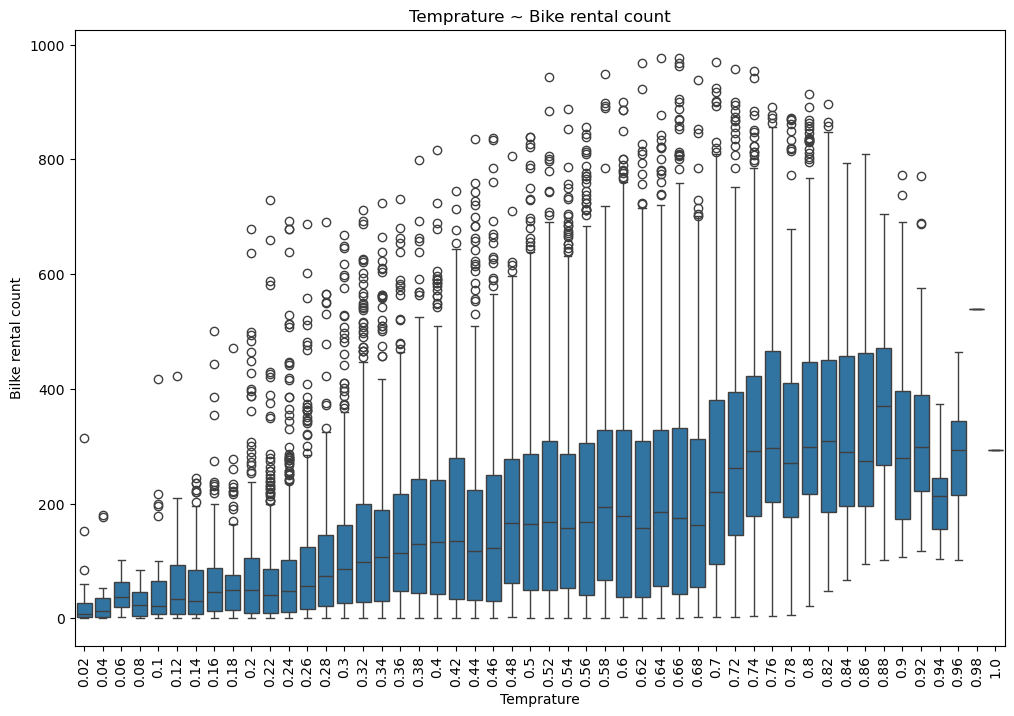

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='temp',y='cnt')
plt.title("Temprature ~ Bike rental count")
plt.xlabel("Temprature")
plt.ylabel("Bilke rental count")
plt.xticks(rotation=90)

plt.show()


The analysis indicates that bike usage increases with warmer temperatures.

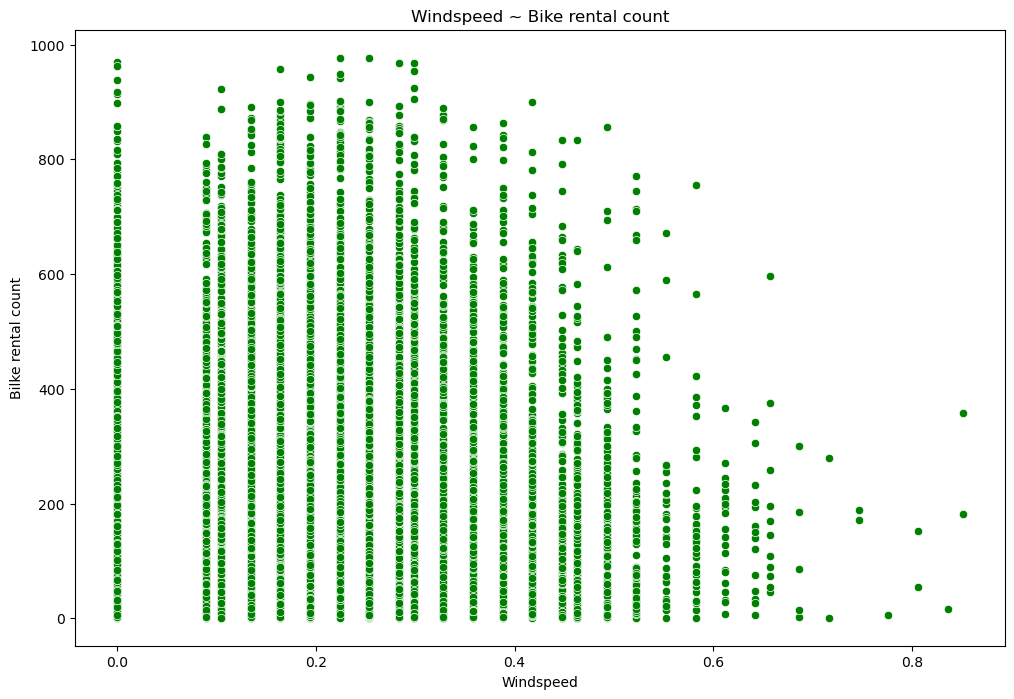

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='windspeed',y='cnt',color="green")
plt.title("Windspeed ~ Bike rental count")
plt.xlabel("Windspeed")

plt.ylabel("Bilke rental count")
plt.show()

As anticipated, higher wind speeds are associated with lower bike rental activity.

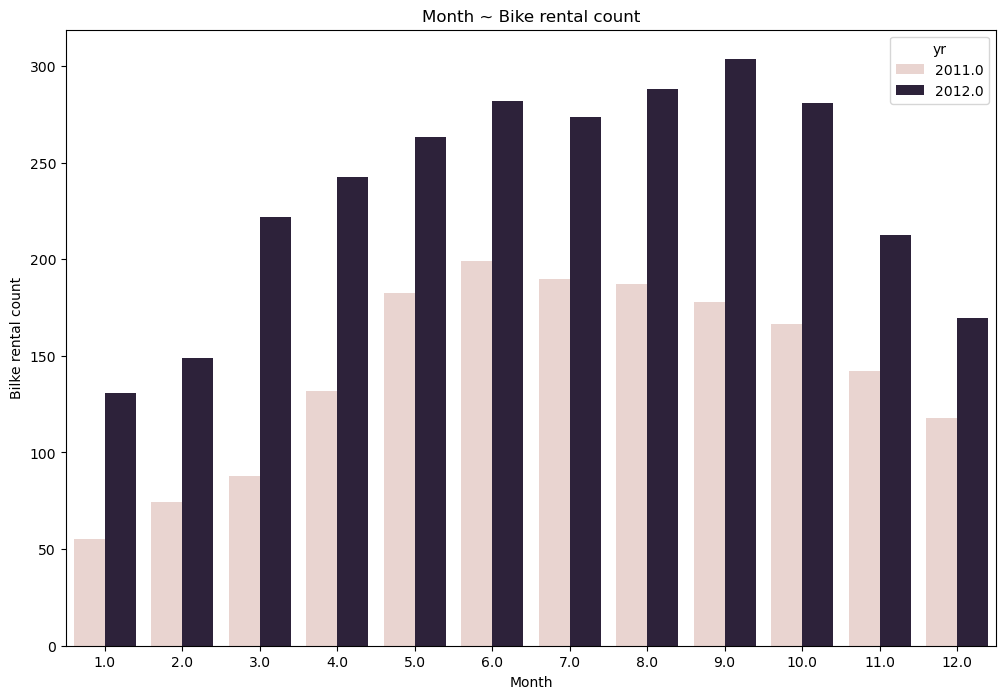

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='mnth',y='cnt', hue='yr', errorbar=None)
plt.title("Month ~ Bike rental count")
plt.xlabel("Month")
plt.ylabel("Bilke rental count")
# plt.xticks(rotation=90)

plt.show()


The total bike rentals have increased, as observed in the above chart. This indicates that bike rental demand has grown over the year. 

In [27]:
# Correlation between columns 

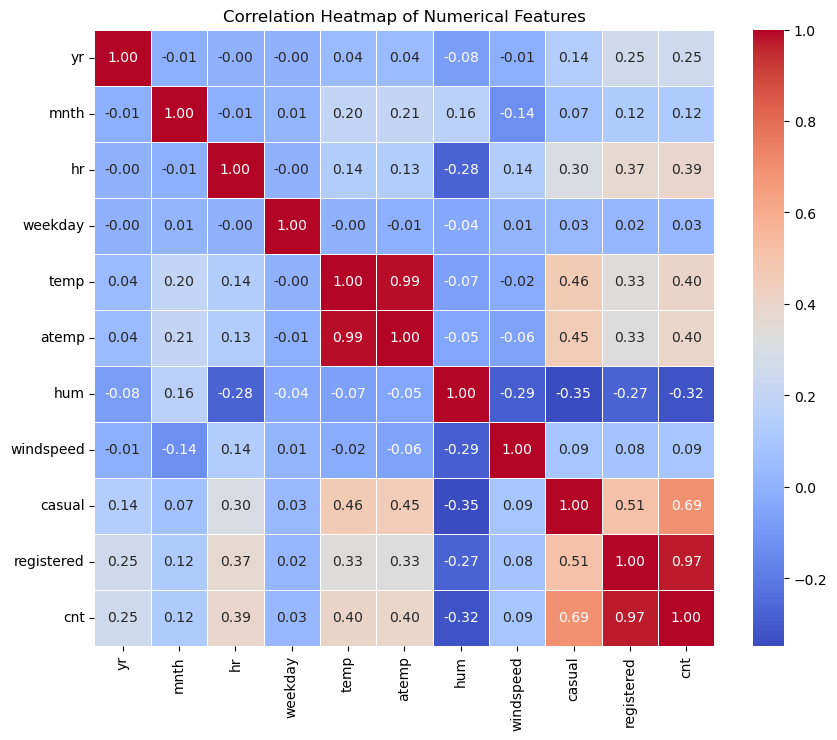

In [28]:
num_df = df.select_dtypes(include=["float64","int64"])
corr_matrix = num_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

As per the above heatmap, a high correlation is observed between atemp and temp, as well as between registered and cnt. To avoid multicollinearity and redundancy, the atemp and registered columns are therefore dropped from the dataset.

In [29]:
df.drop(['atemp','casual', 'registered',"dteday"],axis=1 , inplace=True)


In [30]:
num_cols.remove( 'registered')
num_cols.remove('atemp')

In [31]:
df = pd.get_dummies(df, columns = cat_col, drop_first=True, dtype=int ) 

df.shape

(17339, 15)

In [32]:
df

,yr,mnth,hr,weekday,temp,hum,windspeed,cnt,season_springer,season_summer,season_winter,workingday_Working Day,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist
0,2011.0,1.0,0,6,0.24,0.81,0.0000,16,1,0,0,0,0,0,0
1,2011.0,1.0,1,6,0.22,0.80,0.0000,40,1,0,0,0,0,0,0
3,2011.0,1.0,3,6,0.24,0.75,0.0000,13,1,0,0,0,0,0,0
4,2011.0,1.0,4,6,0.24,0.75,0.0000,1,1,0,0,0,0,0,0
5,2011.0,1.0,5,6,0.24,0.75,0.0896,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,2012.0,12.0,15,1,0.28,0.45,0.1343,315,1,0,0,1,0,0,1
17373,2012.0,12.0,18,1,0.26,0.48,0.1343,122,1,0,0,1,0,0,1
17374,2012.0,12.0,19,1,0.26,0.60,0.1642,119,1,0,0,1,0,0,1
17375,2012.0,12.0,20,1,0.26,0.60,0.1642,89,1,0,0,1,0,0,1


In [34]:
df.to_csv("EDA_bike_rental.csv",index=False )